In [1]:
%pylab inline

from PyTools import err, binner, nbins
from scipy.ndimage.filters import gaussian_filter
import pres_style, os

Populating the interactive namespace from numpy and matplotlib


In [10]:
odir = "/home/chapi/mejia/test_c1_c2/"

# READ C1 & C2 NAMES
c1 = loadtxt(odir+"SEDs/C1.txt", dtype=str)
c2 = loadtxt(odir+"SEDs/C2.txt", dtype=str)
names = sorted([file for root, subs, files in os.walk(odir+"SEDs/") for file in files if file.startswith("processed")])

c1m = array([name in c1 for name in names], dtype=bool)
c2m = array([name in c2 for name in names], dtype=bool)

# READ PROBLEM SEDs
slist = sorted([os.path.join(root, file) for root, subs, files in os.walk(odir+"SEDs/") for file in files if file.startswith("processed")])
wl_range = []
snr = []
for file in slist:
    wl, fl, sg = loadtxt(file, usecols=(0,1,2), unpack=True)
    
    mask = fl > 0.0
    wl_range.append((wl[mask].min(), wl[mask].max()))
    snr.append(median(fl[mask]/sg[mask]))

wl_range = array(wl_range)
snr = array(snr)

# READ GUSTAVO'S RESULTS
glist = sorted([os.path.join(root, file) for root, subs, files in os.walk(odir+"eps0.00/") for file in files if file.endswith("results")])
gtable = []
for file in glist:
    with open(file, "r") as f:
        for i in xrange(16): line = f.readline()
        gtable.append(map(eval, array(line.split())[[4, 7, 8, 9, 10, 2, 3]]))

gtable = array(gtable)

# READ MINES
atable = loadtxt(odir+"av0_losvd0/dynbas_output.log", usecols=(2, 3, 4, 5, 6, 7, 8, 9))

gtable[:, 0] = log10(gtable[:, 0])
atable[:, 0] = log10(atable[:, 0])

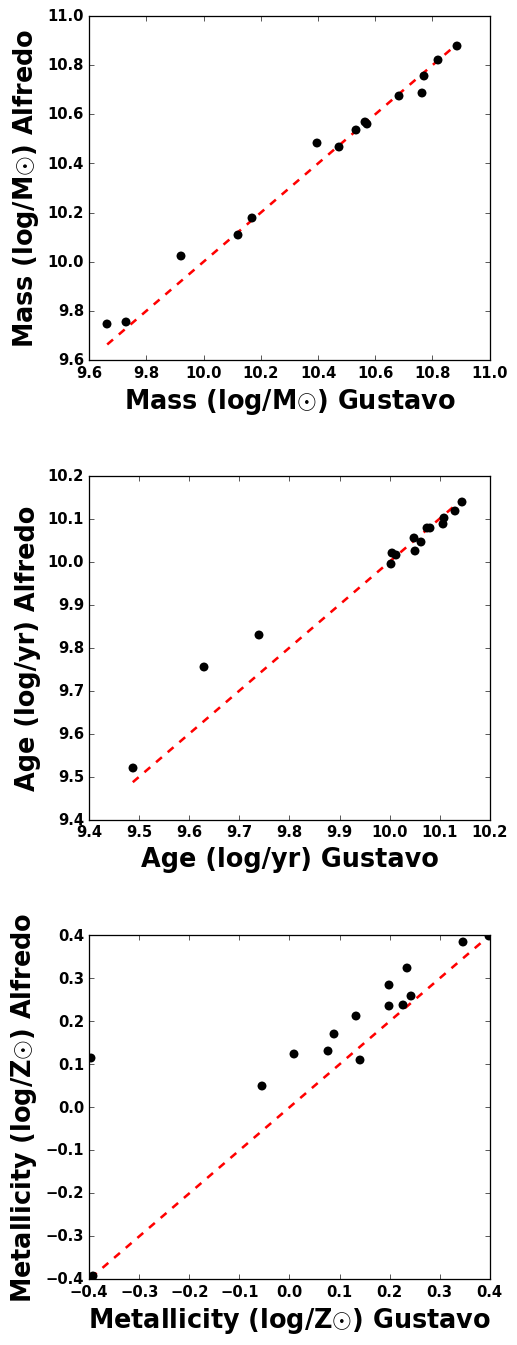

In [11]:
# COMPARE RESULTS
fig, axs = subplots(3, 1, figsize=(6, 15))

lbs = ["Mass (log/M$\odot$)", "Age (log/yr)", "Age (log/yr)", "Metallicity (log/Z$\odot$)",
               "Metallicity (log/Z$\odot$)", "Dust Extinction (mag)"]
for i, ax in zip([0, 1, 3], axs.ravel()):
    lim = [np.min([gtable[:, i], atable[:, i]]), np.max([gtable[:, i], atable[:, i]])]

    ax.plot(lim, lim, "--r")
    ax.plot(gtable[:, i], atable[:, i], "ok")
    
    #ax.set_aspect("equal")
    ax.set_xlabel(lbs[i]+" Gustavo")
    ax.set_ylabel(lbs[i]+" Alfredo")
fig.tight_layout()

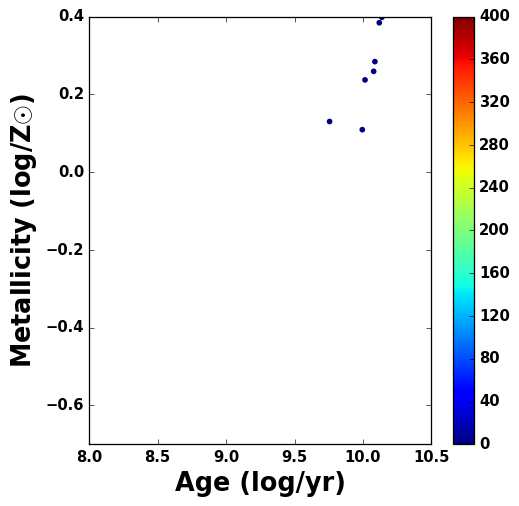

In [13]:
figure(figsize=(6, 6))

#plot(gtable[c2m, 1], gtable[c2m, 3], "s", label="Gustavo")
scatter(atable[c2m, 1], atable[c2m, 3], c=atable[c2m, -2], lw=0, s=20, vmin=0, vmax=400)
colorbar()

#legend(loc=0)
xlim(8, 10.5)
ylim(-0.7, 0.4)
xlabel(lbs[1])
ylabel(lbs[3])